## DF 분포 비교

### 목적: rating=1~5 까지의 리뷰의 단어들의 분포를 시각적으로 비교

1. rating=1~5 문서들로 각각 corpus 생성
2. 각 corpus 에 대해 TFIDF 벡터 생성 
  1. 모든 corpus 에 대해 공통(common) 단어셋 추출
  2. 각 corpus 에 대해 고유(unique) 단어셋 추출
3. log(DF) 에 대해 bin 설정하고 분포 그래프 출력
  - 공통 출현 단어셋의 분포
  - 고유 출현 단어셋의 분포

### 데이터 로딩

In [1]:
from google.colab import drive
drive.mount('/gdrive')

data_path = "/gdrive/MyDrive/Colab Notebooks/제주ICT-AI분석반-쇼핑몰분석/data"

# 파일을 못찾을 경우, 이렇게 확인을 해야 함!!
import os
os.chdir( data_path )
!ls -l

Mounted at /gdrive
total 52701
-rw------- 1 root root  188900 Jul  7 08:13 sample_submission.csv
-rw------- 1 root root  188888 Jul 25 09:17 submission_v2.csv
-rw------- 1 root root  188889 Jul 25 09:11 submission_v3.csv
-rw------- 1 root root  188889 Jul 25 13:52 submission_v4.csv
-rw------- 1 root root 2679138 Jul  7 08:13 test.csv
-rw------- 1 root root 8288753 Jul 24 11:11 test_mecab.csv
-rw------- 1 root root 7841571 Jul 24 11:35 test_okt.csv
-rw------- 1 root root 7650515 Jul 25 08:57 test_okt_stem.csv
-rw------- 1 root root 2738015 Jul  7 08:13 train.csv
-rw------- 1 root root 8366728 Jul 24 11:09 train_mecab.csv
-rw------- 1 root root 7916589 Jul 24 11:29 train_okt.csv
-rw------- 1 root root 7726432 Jul 25 07:25 train_okt_stem.csv


In [3]:
import pandas as pd

# Okt 토크나이징 데이터 로딩
# ==> NaN, 한글자 제거
train_df = pd.read_csv(f'{data_path}/train_okt_stem.csv')
train_df
# 24984 rows × 8 columns

,id,reviews,target,mrp_tokens,pos_tokens,mrp_tsize,pos_tsize,pos_csize
0,0,조아요 처음구입 싸게햇어요,2,조아요 처음 구입 싸게 햇 어 요,좋다 처음 구입 싸다 하다,7,5,10
1,1,생각보다 잘 안돼요 매지 바른지 하루밖에 안됐는데ㅠㅠ 25천원가량 주고 사기 너무 ...,1,생각 보다 잘 안 돼요 매지 바른지 하루 밖에 안 됐는데 25천원 가량 주고 사기 ...,생각 자다 안 돼다 매다 바르다 하루 안 돼다 주다 사기 너무 아깝다,17,13,26
2,2,디자인은괜찮은데 상품이 금이가서 교환했는데 두번째받은상품도 까져있고 안쪽에 금이가져...,2,디자인 은 괜찮은데 상품 이 금 이 가서 교환 했는데 두번째 받은 상품 도 까져있고...,디자인 괜찮다 상품 금 가다 교환 하다 두번째 받다 상품 끄다 안쪽 금 가다 귀찮다...,28,21,46
3,3,기전에 이 제품말고 이마트 트레이더스에서만 팔던 프리미엄 제품을 사용했었습니다. 샘...,2,기전 에 이 제품 말고 이마트 트 레이더스 에서만 팔던 프리미엄 제품 을 사용 했었...,기전 이 제품 이마트 트 레이더스 파다 프리미엄 제품 사용 하다 샘플 써다 보고 마...,53,39,82
4,4,튼튼하고 손목을 잘 받쳐주네요~,5,튼튼하고 손목 을 잘 받쳐주네요 ~,튼튼하다 손목 자다 받치다,6,4,11
...,...,...,...,...,...,...,...,...
24979,24995,일단향이너무너무좋은데지속력만좋다면좋겠지만..워낙저렴해그래도좋아여,5,일단 향 이 너무 너무 좋은데 지속 력 만 좋다면 좋겠지만 .. 워낙 저렴해 그래도...,일단 향 너무 너무 좋다 지속 력 좋다 좋다 워낙 저렴하다 그래도좋아,16,12,27
24980,24996,동일한 업체에서 발송하고 한 상자로 배송되었는데 택배비는 이중 처리되었습니다.,2,동일한 업체 에서 발송 하고 한 상자 로 배송 되었는데 택배 비는 이중 처리 되었습...,동일하다 업체 발송 하다 상자 배송 되어다 택배 비다 이중 처리 되어다,16,12,28
24981,24997,향이 좋아요!! 다른 향도 시켜보고 싶어요,4,향 이 좋아요 !! 다른 향 도 시켜 보고 싶어요,향 좋다 다른 향 시키다 보고 싶다,10,7,13
24982,24998,펼쳐보니 끝부분쯤에 50cm정도 찟어져 있습니다 날짜관계로 구냥 사용합니다,2,펼쳐 보니 끝 부분 쯤 에 50 cm 정도 찟어져 있습니다 날짜 관계 로 구 냥 사...,펼치다 보다 끝 부분 쯤 정도 찟어져 있다 날짜 관계 구 사용 하다,18,13,25


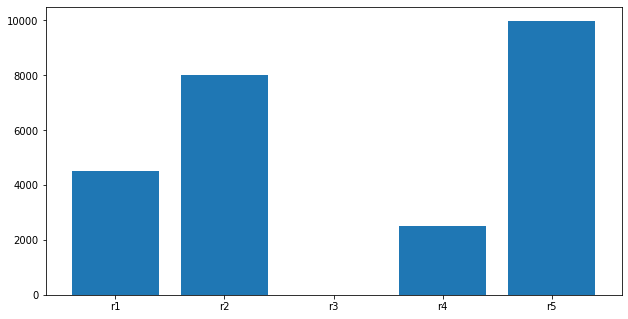

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8,4))
# 축 설정: rect=[left, bottom, width, height]
ax = fig.add_axes([0,0,1,1])  
# x축 데이터, y축 데이터
ax.bar(corpus_label, [len(df) for df in corpus_data] )
plt.show()

In [4]:
# 평점 그룹별 corpus 생성
r1_df = train_df[ train_df['target']==1 ]
r2_df = train_df[ train_df['target']==2 ]
r3_df = train_df[ train_df['target']==3 ]   # 없음(0건) 
r4_df = train_df[ train_df['target']==4 ]
r5_df = train_df[ train_df['target']==5 ]

corpus_label =[ 'r1', 'r2', 'r3', 'r4', 'r5' ]
corpus_data = [ r1_df, r2_df, r3_df, r4_df, r5_df ]

total_size = 0
for label, df in zip(corpus_label, corpus_data):
  df_size = len(df)
  total_size += df_size
  print(f'{label}_df: size={total_size}')  
print('=='*10)
print(f'total: size={total_size}')


r1_df: size=4499
r2_df: size=12491
r3_df: size=12491
r4_df: size=14991
r5_df: size=24984
total: size=24984


### 전체 코퍼스: IDF 분포

- TfidfVectorizer(min_df=3) : vocab_size=8832
  - (min_df=1) : vocab_size=31997
- 단어 리스트 : vectorizer.vocabulary_.items()
  - (단어, 순위) : 순위는 가나다순 (맵핑을 위한 순서일뿐)
- IDF 리스트 : vectorizer.idf_
  - IDF: 10.027378610294805 ~ 3.0457534827462123

In [6]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=2)  # token_pattern=r'([가-힣]{1,})')
vectorizer.fit( train_df['pos_tokens'] )
print( 'vocab_size =', len(vectorizer.vocabulary_) )  # len=6855

# (단어, 순서) 정렬 후 단어만 추출
terms = [k for (v, k) in sorted((v, k) for k, v in vectorizer.vocabulary_.items())]
# IDF : 큰 값이 DF 값으로는 최저값 (1/DF)
idf_r0 = pd.DataFrame(zip(terms, vectorizer.idf_), columns=['terms','idf'])
idf_r0


vocab_size = 6855


,terms,idf
0,가가,9.516593
1,가게,8.353442
2,가격,3.907121
3,가공,9.516593
4,가구,7.570683
...,...,...
6850,힘들다,5.822726
6851,힘안,10.027419
6852,힘없다,8.928806
6853,힘주다,9.046589


In [7]:
max_idf = idf_r0['idf'].max()
min_idf = idf_r0['idf'].min()
print( 'IDF :', max_idf, '~', min_idf )

# idfx10
idf_r0['idf_10'] = idf_r0['idf'].apply(lambda x: int(10*x))

# n_bin = 100
idf_r0['idf_norm'] = idf_r0['idf'].apply(lambda x: int(99*(max_idf-x)/(max_idf-min_idf))+1 )
max_idf = idf_r0['idf_norm'].max()
min_idf = idf_r0['idf_norm'].min()
print( 'IDF_norm :', min_idf, '~', max_idf )

IDF : 10.027418635110196 ~ 2.0753899305597976
IDF_norm : 1 ~ 100


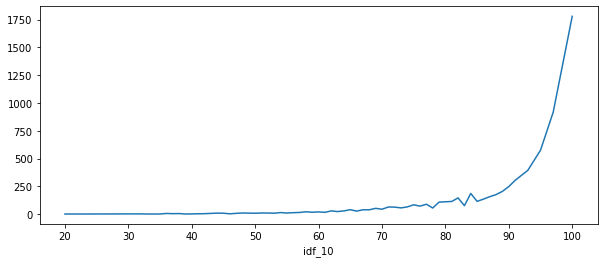

In [ ]:
idf_r0.groupby('idf_10').count()['terms'].plot.line(figsize=(10,4))

### r1 코퍼스: IDF 분포

- TfidfVectorizer(min_df=1) : vocab_size=12561
- 단어 리스트 : vectorizer.vocabulary_.items()
  - (단어, 순위) : 순위는 가나다순 (맵핑을 위한 순서일뿐)
- IDF 리스트 : vectorizer.idf_
  - IDF: 8.718685495198466 ~ 2.8780438378250675

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)  # 6117
vectorizer.fit( r1_df['pos_tokens'] )
print( 'vocab_size =', len(vectorizer.vocabulary_) )

# (단어, 순서) 정렬 후 단어만 추출
terms = [k for (v, k) in sorted((v, k) for k, v in vectorizer.vocabulary_.items())]
# IDF : 큰 값이 DF 값으로는 최저값 (1/DF)
idf_r1 = pd.DataFrame(zip(terms, vectorizer.idf_), columns=['terms','idf'])
idf_r1


vocab_size = 6117


,terms,idf
0,가가,8.718685
1,가게,8.025538
2,가격,4.293839
3,가격표,8.718685
4,가공,8.718685
...,...,...
6112,힘껏,8.718685
6113,힘드다,6.467394
6114,힘들다,5.627643
6115,힘없다,8.025538


In [ ]:
max_idf = idf_r1['idf'].max()
min_idf = idf_r1['idf'].min()
print( 'IDF :', max_idf, '~', min_idf )

# idfx10
idf_r1['idf_10'] = idf_r1['idf'].apply(lambda x: int(10*x))

# n_bin = 100
idf_r1['idf_norm'] = idf_r1['idf'].apply(lambda x: int(99*(max_idf-x)/(max_idf-min_idf))+1 )
max_idf = idf_r1['idf_norm'].max()
min_idf = idf_r1['idf_norm'].min()
print( 'IDF_norm :', min_idf, '~', max_idf )

IDF : 8.718685495198466 ~ 2.005121945580771
IDF_norm : 1 ~ 100


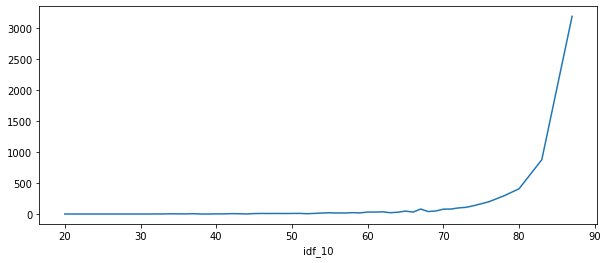

In [ ]:
idf_r1.groupby('idf_10').count()['terms'].plot.line(figsize=(10,4))

### r5 코퍼스: IDF 분포

- TfidfVectorizer(min_df=1) : vocab_size=14331
- 단어 리스트 : vectorizer.vocabulary_.items()
  - (단어, 순위) : 순위는 가나다순 (맵핑을 위한 순서일뿐)
- IDF 리스트 : vectorizer.idf_
  - IDF: 9.516593011344206 ~ 2.7064505612290684

In [ ]:
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(min_df=1)  # 7158
vectorizer.fit( r5_df['pos_tokens'] )
print( 'vocab_size =', len(vectorizer.vocabulary_) )

# (단어, 순서) 정렬 후 단어만 추출
terms = [k for (v, k) in sorted((v, k) for k, v in vectorizer.vocabulary_.items())]
# IDF : 큰 값이 DF 값으로는 최저값 (1/DF)
idf_r5 = pd.DataFrame(zip(terms, vectorizer.idf_), columns=['terms','idf'])
idf_r5


vocab_size = 7158


,terms,idf
0,가걱,9.516593
1,가게,8.012516
2,가격,3.796281
3,가경,9.516593
4,가계부,9.516593
...,...,...
7153,힌지,9.516593
7154,힐링,9.111128
7155,힘드다,7.165218
7156,힘들다,6.202407


In [ ]:
max_idf = idf_r5['idf'].max()
min_idf = idf_r5['idf'].min()
print( 'IDF :', max_idf, '~', min_idf )

# idfx10
idf_r5['idf_10'] = idf_r5['idf'].apply(lambda x: int(10*x))

# n_bin = 100
idf_r5['idf_norm'] = idf_r5['idf'].apply(lambda x: int(99*(max_idf-x)/(max_idf-min_idf))+1 )
max_idf = idf_r5['idf_norm'].max()
min_idf = idf_r5['idf_norm'].min()
print( 'IDF_norm :', min_idf, '~', max_idf )

IDF : 9.516593011344206 ~ 1.8628609381575902
IDF_norm : 1 ~ 100


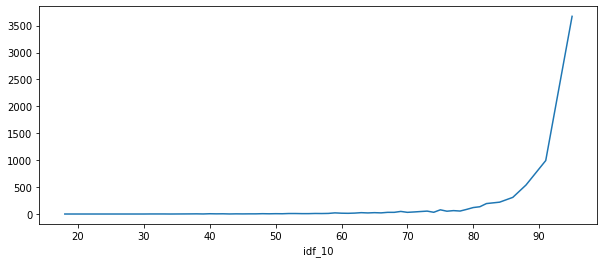

In [ ]:
idf_r5.groupby('idf_10').count()['terms'].plot.line(figsize=(10,4))

### r0, r1, r5 코퍼스: IDF 분포

- idf_10 병합

In [ ]:
idf_df = pd.merge(
    idf_r0.groupby('idf_10').count()['terms'], 
    idf_r1.groupby('idf_10').count()['terms'], 
    left_index=True, right_index=True,
    how='outer', suffixes=('_r0', '_r1')
    )
idf_df

,terms_r0,terms_r1
idf_10,,
20,1.0,1.0
23,1.0,NaN
28,NaN,1.0
30,2.0,NaN
31,NaN,1.0
...,...,...
91,304.0,NaN
93,394.0,NaN
95,575.0,NaN


In [ ]:
idf_df = pd.merge(
    idf_df, 
    idf_r5.groupby('idf_10').count()['terms'], 
    left_index=True, right_index=True,
    how='outer', suffixes=('', '_r5')
    )
idf_df

,terms_r0,terms_r1,terms
idf_10,,,
18,NaN,NaN,1.0
20,1.0,1.0,NaN
21,NaN,NaN,1.0
23,1.0,NaN,NaN
28,NaN,1.0,1.0
...,...,...,...
91,304.0,NaN,994.0
93,394.0,NaN,NaN
95,575.0,NaN,3673.0


In [ ]:
idf_df.columns = ['terms_r0', 'terms_r1', 'terms_r5']

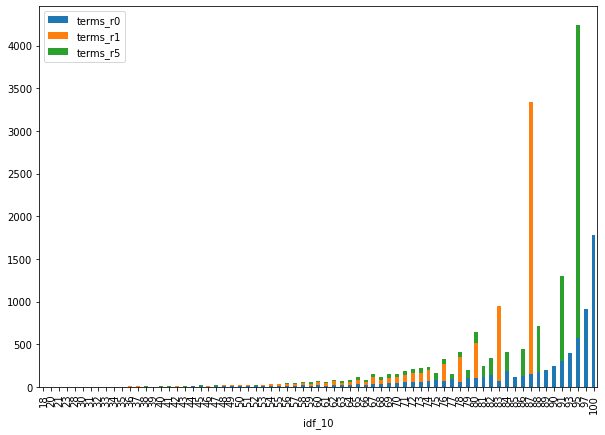

In [ ]:
ax = idf_df.plot.bar(stacked=True, figsize=(10,7))
# ax.set_xticks(ticks, minor=False)

# X축 간격 조정이 안되네. 
# 아뭏튼, 부정과 긍정 코퍼스에 각각 구별되는 단어들이 있다는 정도는 확인!! 

---

## 평점 1과 5의 문서들에 대한 Tfidf 시각화

참고: 

- [Analyzing tf-idf results in scikit-learn](https://buhrmann.github.io/tfidf-analysis.html)
- [TF-IDF를 통한 변수선택과 t-SNE를 활용한 시각화](https://donghwa-kim.github.io/TFIDF.html)
- [Rapid Text Visualization with Yellowbrick](https://medium.com/@sangarshananveera/rapid-text-visualization-with-yellowbrick-51d3499c9333)


In [8]:
import numpy as np
features = sorted(vectorizer.vocabulary_.items(), key=lambda x: (-x[1],x[0]))
df_arr = [f[1] for f in features]

max_df = 0.1  # ratio=10% of terms
top_n = int(len(df_arr)*max_df)
df_bound = df_arr[top_n]
print(f'max_df={max_df} => top_n={top_n} (df > {df_bound})')
print('--'*30)

# 많아도 20개만 출력
for i, f in enumerate(features[:top_n]):
  if i > 20: break
  print(f'[{i:03d}]', f)  

# 메모리 낭비 없이 한번 스캔으로 조건에 맞는 카운트 하기
# top_n = sum(1 for v in df_arr if v >= max_bound)

max_df=0.1 => top_n=685 (df > 6169)
------------------------------------------------------------
[000] ('힘줄', 6854)
[001] ('힘주다', 6853)
[002] ('힘없다', 6852)
[003] ('힘안', 6851)
[004] ('힘들다', 6850)
[005] ('힘드다', 6849)
[006] ('힘껏', 6848)
[007] ('힐링', 6847)
[008] ('힌지', 6846)
[009] ('히히히', 6845)
[010] ('흰색', 6844)
[011] ('희망', 6843)
[012] ('희다', 6842)
[013] ('흥미', 6841)
[014] ('흥건', 6840)
[015] ('흡착', 6839)
[016] ('흡족하다', 6838)
[017] ('흡입', 6837)
[018] ('흡수', 6836)
[019] ('흡사하다', 6835)
[020] ('흠칫', 6834)


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Vectorization 적용하여 벡터화 
vect_pipe = TfidfVectorizer(min_df=2)
vect_pipe.fit( train_df['pos_tokens'])  # vocab_size = 28550

# 문서 100건에 대한 top_n 토큰 출력
n_doc=100
Xtr = vect_pipe.transform( train_df.iloc[1000:1000+n_doc,4] )
features = vect_pipe.get_feature_names_out()


feature_arr = np.array(vectorizer.get_feature_names_out())
tfidf_sorting = np.argsort(Xtr.toarray()).flatten()[::-1]

n = 5
top_n_terms = feature_arr[tfidf_sorting][:n]
print(top_n_terms)

########################

def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

def top_feats_in_doc(Xtr, features, row_id, top_n=25):
  ''' Top tfidf features in specific document (matrix row) '''
  row = np.squeeze(Xtr[row_id].toarray())
  return top_tfidf_feats(row, features, top_n)

top_feats_in_doc(Xtr, features, 0, top_n=25)

,feature,tfidf
0,안좋다,0.882928
1,너무,0.469508
2,미숙,0.000000
3,미듐,0.000000
4,미라,0.000000
5,미루다,0.000000
6,미리,0.000000
7,미미,0.000000
8,미미하다,0.000000
9,미백,0.000000


In [11]:
#!pip install yellowbrick
from yellowbrick.text import TSNEVisualizer,UMAPVisualizer
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

def visualize(dim_reduction,encoding,corpus_data,corpus_target,labels = True,alpha=0.7,metric=None, fig=None):
    if 'tfidf' in encoding.lower():
        encode  = TfidfVectorizer()
    if 'count' in encoding.lower():
        encode = CountVectorizer()
    docs   = encode.fit_transform(corpus_data)
    if labels is True:
        labels = corpus_target
    else:
        labels = None

    import matplotlib.pyplot as plt 
    if not fig: fig = plt.figure(figsize=(13,6))
    ax=fig.add_subplot(111)

    if 'umap' in dim_reduction.lower():
        if metric is None:
            viz   = UMAPVisualizer(ax=ax)
        else:
            viz = UMAPVisualizer(metric=metric,ax=ax)
    if 't-sne' in dim_reduction.lower():
        viz = TSNEVisualizer(alpha = alpha,ax=ax)
    viz.fit(docs,labels)
    return viz.poof()

In [12]:
# 평점 그룹마다 문서 n_doc 만큼 뽑아 corpus 만들기 
n_doc=250
doc_r1 = train_df[ train_df['target']==1 ].iloc[:n_doc,4].tolist()
doc_r2 = train_df[ train_df['target']==2 ].iloc[:n_doc,4].tolist()
doc_r3 = train_df[ train_df['target']==3 ].iloc[:n_doc,4].tolist()
doc_r4 = train_df[ train_df['target']==4 ].iloc[:n_doc,4].tolist()
doc_r5 = train_df[ train_df['target']==5 ].iloc[:n_doc,4].tolist()
corpus_data = doc_r1+doc_r2+doc_r3+doc_r4+doc_r5

label_func = lambda r,n: [ f'r_{n}' for _ in range(len(r)) ]
corpus_target = label_func(doc_r1,1)+label_func(doc_r2,2)+label_func(doc_r3,3)+label_func(doc_r4,4)+label_func(doc_r5,5)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* a

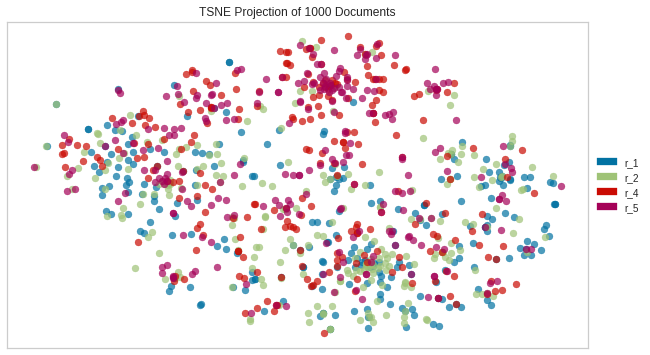

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sns    

fig = plt.figure(figsize=(13,6))
visualize('t-sne','count',corpus_data,corpus_target,fig=fig)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* a

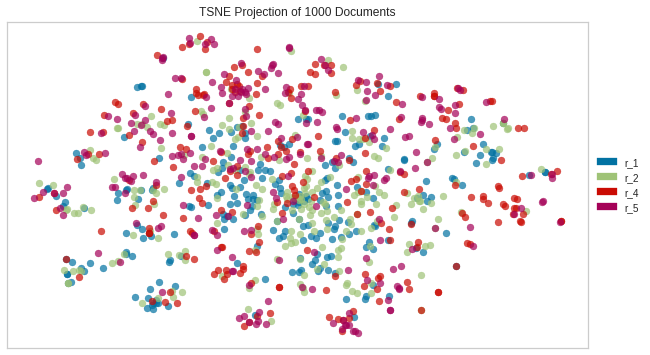

In [14]:
fig = plt.figure(figsize=(13,6))
visualize('t-sne','tfidf',corpus_data,corpus_target,fig=fig)